## <font color=black>  Querying and plotting Multivariate data with `Pandas` and `Matplotlib` packages  </font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading the dataset

The dataset:
"https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
CarsData = pd.read_csv(url, na_values='NA', header=None,sep=r"\s+")
# created a list of the column names
columnNames=['mpg','cylinders', 'displacement','horsepower','weight','acceleration','model year','origin','car name']
CarsData.columns = columnNames
CarsData.shape

(406, 9)

In [4]:
CarsData[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


###  <font color=black> Make scatter plots of four variables of the dataset using multiple Juxtaposed displays:</font> 

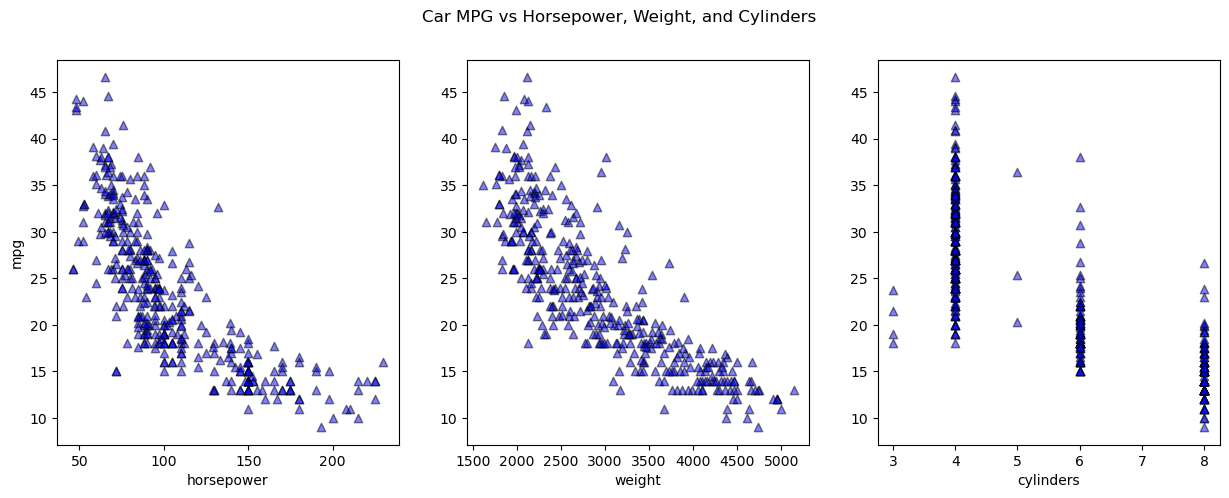

In [4]:
#first create a figure with 3 subplots arranged in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 1) Scatter plot of MPG vs horsepower
axs[0].scatter(CarsData['horsepower'], CarsData['mpg'], marker='^', facecolors='blue', edgecolors='black', alpha=0.5)
axs[0].set_xlabel('horsepower')
axs[0].set_ylabel('mpg')


# 2) Scatter plot of MPG vs weight
axs[1].scatter(CarsData['weight'], CarsData['mpg'], marker='^', facecolors='blue', edgecolors='black', alpha=0.5)
axs[1].set_xlabel('weight')


# 3) Scatter plot of MPG vs cylinders
axs[2].scatter(CarsData['cylinders'], CarsData['mpg'], marker='^', facecolors='blue', edgecolors='black', alpha=0.5)
axs[2].set_xlabel('cylinders')


# Share the y-axis label and ticks with the left subplot
plt.setp(axs[1:], ylabel='')

# general title for figure
plt.suptitle('Car MPG vs Horsepower, Weight, and Cylinders')

# save figure as a pdf file
plt.savefig('multi-scatters Of MPG vs HP_Wt_Cyl.pdf')

# Show the plot
plt.show()

### <font color=black> Make scatter plots of four variables of the dataset using Dimension Embeding:</font>

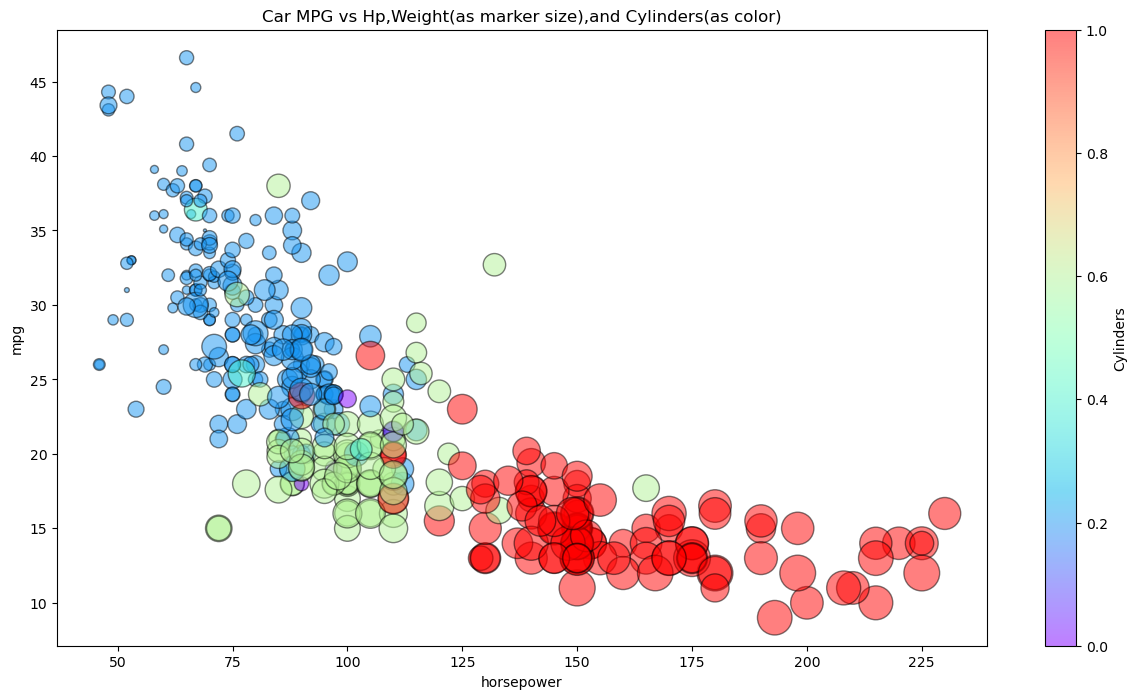

In [16]:
# Normalize the weight variable to values between 5 and 700 
weight_min = CarsData['weight'].min()
weight_max = CarsData['weight'].max()
CarsData['weight_scaled'] = 5 + ((CarsData['weight'] - weight_min) * (700 - 5) / (weight_max - weight_min))

# Normalize the cylinders variable to values between 0 and 1
cylinders_min = CarsData['cylinders'].min()
cylinders_max = CarsData['cylinders'].max()
CarsData['cylinders_normalized'] = (CarsData['cylinders'] - cylinders_min) / (cylinders_max - cylinders_min)

# Create a scatter plot with markers of different size and color
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(CarsData['horsepower'], CarsData['mpg'], s=CarsData['weight_scaled'], c=CarsData['cylinders_normalized'], cmap='rainbow', alpha=0.5, edgecolors='black')
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')
ax.set_title('Car MPG vs Hp,Weight(as marker size),and Cylinders(as color)')

# Add a colorbar to the plot
colorbar = plt.colorbar(scatter)
colorbar.ax.set_ylabel('Cylinders')

# Save the figure as a PDF file
plt.savefig('OneScatter Of MPG vs HP_Wt_Cyl.pdf')

# Show the plot
plt.show()
